
TD - Pandas - MAtplotlib
A partir des données airbnb, répondez à ces questions en proposant à chaque fois une
visualisation avec seaborn ou matplotlib:
1. Calculez le nombre d’host et le nombre de review par quartier.
(neighbourhood_cleansed)?
2. Quels sont les pourcentage d’acceptation et de réponse moyen des hosts?
3. Quel pourcentage des hosts on une vérification:
    ○ par téléphone
    ○ par email
    ○ par email pro
4. En fonction du room type, calculez le nombre moyen d’ “amenities”son écart type.
5. Quel est le prix median par type de room, le maximum, le minimum, le premier et le
troisième quartile?
6. Combien y-a-t-il d’annonces par valeur de salle de bain? (0.5 / 1 / 1.5 ....)?
7. Si on considère qu’un "bath" vaut 1, qu’une bath shared et une half-bath vaut 0.5 et
qu’un private bath vaut 2. (2 half bath vaut donc 1)
8. Il y a t’il une corrélation entre le nombre de reviews et la taille de la description en
termes de nombre de caractères?
9. On suspecte des faux commentaires. Pour identifier cela on regarde les séjours où le
nom de l’host est le même que le nom du reviewer. Quel est ce pourcentage général
de séjour où le nom de l'host est identique au nom du reviewer?


In [1]:
import pandas as pd
# On utilise la fonction read_csv et on indique le chemin relatif
df_air_bnb = pd.read_csv("listings.csv")

In [2]:
df_air_bnb.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [3]:
unique_neighbourhoods = df_air_bnb['neighbourhood_cleansed'].unique()
print(unique_neighbourhoods)
df_air_bnb['neighbourhood_cleansed'].nunique()

['Westerpark' 'Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost'
 'Centrum-West' 'Zuid' 'Oud-Oost' 'De Pijp - Rivierenbuurt' 'Slotervaart'
 'De Baarsjes - Oud-West' 'Bos en Lommer' 'IJburg - Zeeburgereiland'
 'Watergraafsmeer' 'Noord-Oost' 'Bijlmer-Centrum' 'Oud-Noord' 'Noord-West'
 'De Aker - Nieuw Sloten' 'Geuzenveld - Slotermeer' 'Osdorp'
 'Gaasperdam - Driemond' 'Bijlmer-Oost' 'Buitenveldert - Zuidas']


22

In [4]:
# df_air_bnb.shape
# pd.set_option('display.max_rows',None)  # to display all rows

df_air_bnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
#1. Calculez le nombre d’host et le nombre de review par quartier.    (neighbourhood_cleansed)?
df_air_bnb['neighbourhood_cleansed']

0                                   Westerpark
1       Oostelijk Havengebied - Indische Buurt
2                                 Centrum-Oost
3                                 Centrum-West
4                                 Centrum-West
                         ...                  
6804                              Centrum-Oost
6805                    De Baarsjes - Oud-West
6806                   De Pijp - Rivierenbuurt
6807                              Centrum-Oost
6808                   De Pijp - Rivierenbuurt
Name: neighbourhood_cleansed, Length: 6809, dtype: object

In [6]:
# choisir les colonnes concernés de df
df3=df_air_bnb[['neighbourhood_cleansed','number_of_reviews']]   
# choisir les 10 première lignes de ce choix pour afficher
df4=df3.head(10)   
df4

,neighbourhood_cleansed,number_of_reviews
0,Westerpark,248
1,Oostelijk Havengebied - Indische Buurt,314
2,Centrum-Oost,339
3,Centrum-West,243
4,Centrum-West,454
5,Centrum-Oost,602
6,Centrum-Oost,44
7,Centrum-West,451
8,Centrum-West,363
9,Zuid,95


In [7]:
df5 = df4['neighbourhood_cleansed'].value_counts()     # va compter le nombre de repitition de chaque quartier qui signifie le nombre de hosts par quartier
df5

Centrum-West                              4
Centrum-Oost                              3
Westerpark                                1
Oostelijk Havengebied - Indische Buurt    1
Zuid                                      1
Name: neighbourhood_cleansed, dtype: int64

In [8]:
df6=df4.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()  # va compter la somme de reviews par quartier
df6

neighbourhood_cleansed
Centrum-Oost                               985
Centrum-West                              1511
Oostelijk Havengebied - Indische Buurt     314
Westerpark                                 248
Zuid                                        95
Name: number_of_reviews, dtype: int64

In [9]:
# convert the Series to a DataFrame
df6 = df6.reset_index()
df6.columns = ['neighbourhood_cleansed', 'number_reviews']
df6

,neighbourhood_cleansed,number_reviews
0,Centrum-Oost,985
1,Centrum-West,1511
2,Oostelijk Havengebied - Indische Buurt,314
3,Westerpark,248
4,Zuid,95


In [10]:
# convert the Series to a DataFrame
df5 = df5.reset_index()
df5.columns = ['neighbourhood_cleansed', 'number_hosts']
df5

,neighbourhood_cleansed,number_hosts
0,Centrum-West,4
1,Centrum-Oost,3
2,Westerpark,1
3,Oostelijk Havengebied - Indische Buurt,1
4,Zuid,1


In [14]:
# merge the DataFrames
df_merged = pd.merge(df5, df6, on='neighbourhood_cleansed')
df_merged = df_merged.rename(columns={'neighbourhood_cleansed_x': 'neighbourhood_cleansed', 'neighbourhood_cleansed_y': 'neighbourhood'})
df_merged

,neighbourhood_cleansed,number_hosts,number_reviews
0,Centrum-West,4,1511
1,Centrum-Oost,3,985
2,Westerpark,1,248
3,Oostelijk Havengebied - Indische Buurt,1,314
4,Zuid,1,95


In [16]:
### Maintenant on peut généraliser sur le df total
##### le nombre de hosts par quartier. 
hosts_by_neighborhood = df_air_bnb['neighbourhood_cleansed'].value_counts()  # va compter le nombre de repitition de chaque quartier qui signifie le nombre de hosts par quartier
print("-------------------------------------")
print("le nombre de hosts par quartier est :")
print("-------------------------------------")
print(hosts_by_neighborhood)
print("-------------------------------------")
##### le nombre de reviews par quartier. 
reviews_by_neighbourhood = df_air_bnb.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()  # va compter la somme de reviews par quartier
print("le nombre de reviews par quartier est :")
print("-------------------------------------")
print(reviews_by_neighbourhood)

-------------------------------------
le nombre de hosts par quartier est :
-------------------------------------
De Baarsjes - Oud-West                    1066
Centrum-West                               930
De Pijp - Rivierenbuurt                    760
Centrum-Oost                               680
Westerpark                                 468
Zuid                                       447
Oud-Oost                                   397
Bos en Lommer                              331
Oud-Noord                                  311
Oostelijk Havengebied - Indische Buurt     257
Watergraafsmeer                            199
Noord-West                                 173
IJburg - Zeeburgereiland                   164
Slotervaart                                147
Noord-Oost                                 110
Geuzenveld - Slotermeer                     88
Buitenveldert - Zuidas                      70
De Aker - Nieuw Sloten                      54
Bijlmer-Centrum                         

In [17]:
# convert the Series to a DataFrame
hosts_by_neighborhood = hosts_by_neighborhood.reset_index()
hosts_by_neighborhood.columns = ['neighbourhood_cleansed', 'number_hosts']
hosts_by_neighborhood

,neighbourhood_cleansed,number_hosts
0,De Baarsjes - Oud-West,1066
1,Centrum-West,930
2,De Pijp - Rivierenbuurt,760
3,Centrum-Oost,680
4,Westerpark,468
5,Zuid,447
6,Oud-Oost,397
7,Bos en Lommer,331
8,Oud-Noord,311
9,Oostelijk Havengebied - Indische Buurt,257


In [18]:
# convert the Series to a DataFrame
reviews_by_neighbourhood = reviews_by_neighbourhood.reset_index()
reviews_by_neighbourhood.columns = ['neighbourhood_cleansed', 'number_hosts']
reviews_by_neighbourhood

,neighbourhood_cleansed,number_hosts
0,Bijlmer-Centrum,2813
1,Bijlmer-Oost,662
2,Bos en Lommer,9811
3,Buitenveldert - Zuidas,2515
4,Centrum-Oost,48021
5,Centrum-West,71027
6,De Aker - Nieuw Sloten,3507
7,De Baarsjes - Oud-West,41664
8,De Pijp - Rivierenbuurt,31752
9,Gaasperdam - Driemond,1918


In [19]:
df_merged = pd.merge(hosts_by_neighborhood, reviews_by_neighbourhood, on='neighbourhood_cleansed')
df_merged = df_merged.rename(columns={'neighbourhood_cleansed_x': 'number_hosts', 'neighbourhood_cleansed_y': 'neighbourhood'})
df_merged

,neighbourhood_cleansed,number_hosts_x,number_hosts_y
0,De Baarsjes - Oud-West,1066,41664
1,Centrum-West,930,71027
2,De Pijp - Rivierenbuurt,760,31752
3,Centrum-Oost,680,48021
4,Westerpark,468,17059
5,Zuid,447,19030
6,Oud-Oost,397,14912
7,Bos en Lommer,331,9811
8,Oud-Noord,311,14359
9,Oostelijk Havengebied - Indische Buurt,257,10156


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_10752/2116536876.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels = df_merged.neighbourhood_cleansed, rotation = 90)
/tmp/ipykernel_10752/2116536876.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels = df_merged.neighbourhood_cleansed, rotation = 90)


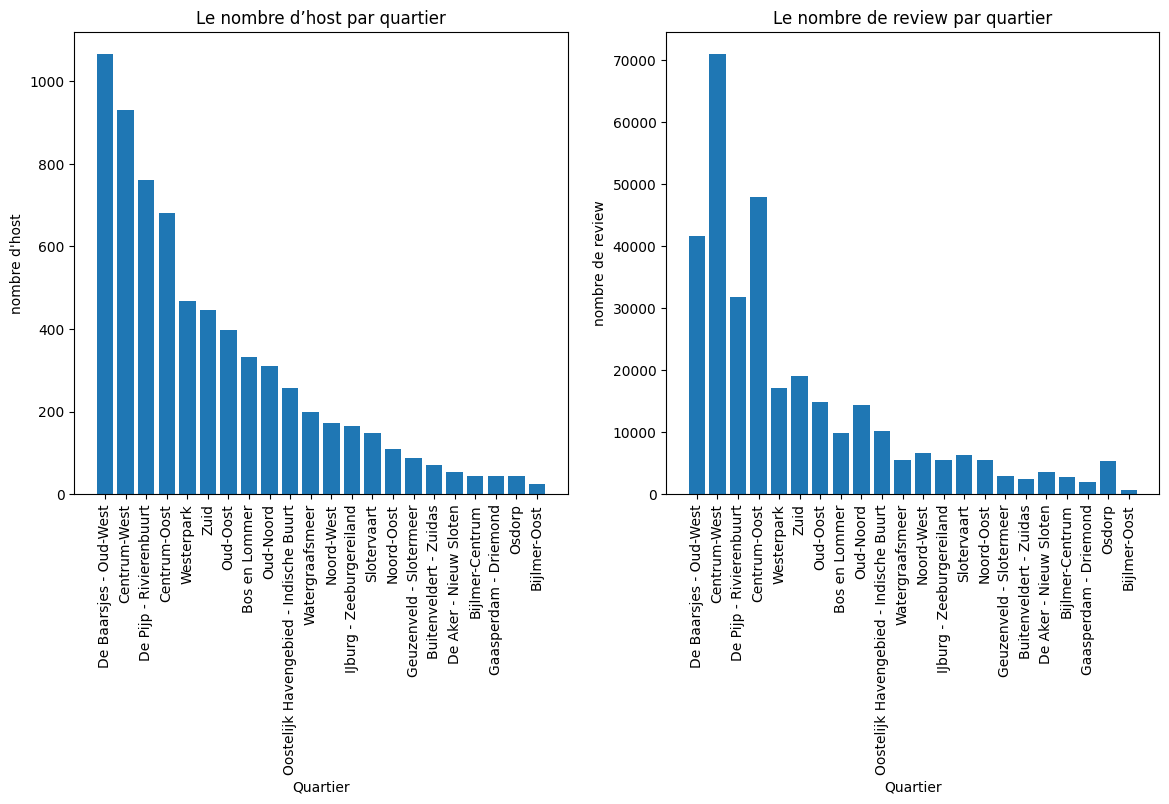

In [208]:

# On commence par instancier une figure et un axe.
# De manière optionnelle, on peut ici préciser sa taille
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
f.set_size_inches(14, 6)

# On crée notre ax1
ax1.bar(df_merged.neighbourhood_cleansed, df_merged.number_hosts)  
# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
ax1.set_title("Le nombre d’host par quartier")
ax1.set_xlabel("Quartier")
ax1.set_ylabel("nombre d'host")
ax1.set_xticklabels(labels = df_merged.neighbourhood_cleansed, rotation = 90)
 
# On crée notre ax2
ax2.bar(df_merged.neighbourhood_cleansed, df_merged.number_reviews)   
# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
ax2.set_title("Le nombre de review par quartier")
ax2.set_xlabel("Quartier")
ax2.set_ylabel("nombre de review")
ax2.set_xticklabels(labels = df_merged.neighbourhood_cleansed, rotation = 90)

# On peut si on veut enregistrer cette figure
plt.savefig("number_hosts_reviews_parquartier.png")

# On affiche notre graphe (optionnel sur les notebook)
plt.show()

In [21]:
#2. Quels sont les pourcentage d’acceptation et de réponse moyen des hosts? 
#pourcentage d’acceptation moyen
print(df_air_bnb['host_acceptance_rate'])
df_accept_rate_sans_pourcentage=df_air_bnb['host_acceptance_rate'].str.replace("%","")
print(df_accept_rate_sans_pourcentage)

print(df_accept_rate_sans_pourcentage.dtype)
df_accept_rate_sans_pourcentage_float= df_accept_rate_sans_pourcentage.astype(float)
df_accept_rate_sans_pourcentage_float

moyenne_pourcent_accept_host=df_accept_rate_sans_pourcentage_float.mean()
moyenne_pourcent_accept_host


0        96%
1       100%
2        98%
3       100%
4       100%
        ... 
6804     88%
6805      0%
6806     83%
6807     99%
6808     50%
Name: host_acceptance_rate, Length: 6809, dtype: object
0        96
1       100
2        98
3       100
4       100
       ... 
6804     88
6805      0
6806     83
6807     99
6808     50
Name: host_acceptance_rate, Length: 6809, dtype: object
object


79.57899260787347

In [22]:
# pourcentage de reponse moyen
print(df_air_bnb['host_response_rate'])
df_response_rate_sans_pourcentage=df_air_bnb['host_response_rate'].str.replace("%","")
print(df_response_rate_sans_pourcentage)

print(df_response_rate_sans_pourcentage.dtype)
df_response_rate_sans_pourcentage_float= df_response_rate_sans_pourcentage.astype(float)
df_response_rate_sans_pourcentage_float

moyenne_pourcent_response_host=df_response_rate_sans_pourcentage_float.mean()
moyenne_pourcent_response_host

0        87%
1       100%
2       100%
3       100%
4       100%
        ... 
6804     80%
6805    100%
6806    100%
6807    100%
6808     NaN
Name: host_response_rate, Length: 6809, dtype: object
0        87
1       100
2       100
3       100
4       100
       ... 
6804     80
6805    100
6806    100
6807    100
6808    NaN
Name: host_response_rate, Length: 6809, dtype: object
object


94.67465825446898

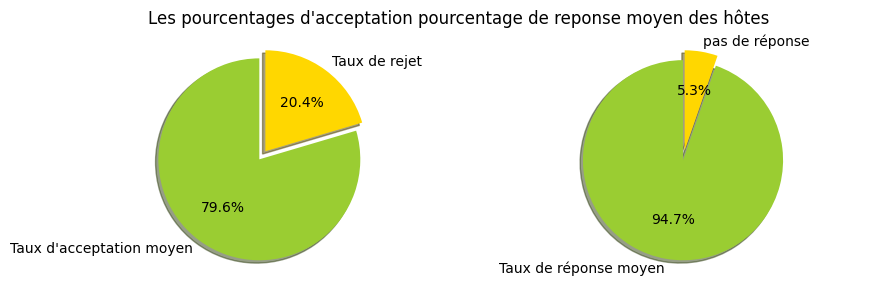

In [23]:
# Créer un diagramme circulaire pour les pourcentages d'acceptation pourcentage de reponse moyen des hôtes   #
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
f.set_size_inches(10, 3)


labels = ["Taux d'acceptation moyen","Taux de rejet"]
remaining1 = 100 - moyenne_pourcent_accept_host
sizes1 =  [moyenne_pourcent_accept_host, remaining1]
colors1 = ["yellowgreen", "gold", "lightskyblue"]
explode = (0.05, 0.05)

# Utiliser la méthode pie de l'objet ax1
ax1.pie(sizes1, colors=colors1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
# ax1.set_title("Taux d'acceptation moyen des hôtes")
#-------------------------------------------------------
labels = ["Taux de réponse moyen","pas de réponse"]
remaining2 = 100 - moyenne_pourcent_response_host
sizes2 =  [moyenne_pourcent_response_host, remaining2]
colors2 = ["yellowgreen", "gold", "lightskyblue"]
explode = (0.05, 0.05)

# Utiliser la méthode pie de l'objet ax2
ax2.pie(sizes2, colors=colors2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
# ax2.set_title("Taux de reponse moyen des hôtes")

# add a title to the figure
plt.suptitle('Les pourcentages d\'acceptation pourcentage de reponse moyen des hôtes')
plt.show()

In [24]:
# 3. Quel pourcentage des hosts on une vérification:
#     ○ par téléphone
#     ○ par email
#     ○ par email pro

host_verif=df_air_bnb['host_verifications']
print("Nombre totale de host_verifications est :",len(host_verif))


count_phone = 0
for phone in host_verif:
    count_phone += phone.count('phone')
print("Nombre des hosts qui on une vérification par téléphone est : ",count_phone) 
pourcentage_phone = (count_phone/len(host_verif))*100
print("Le pourcentage des hosts on une vérification par téléphone est :", pourcentage_phone)
###################################
count_email = 0
for email in host_verif:
    if 'work_email' not in email:
        count_email += email.count('email')
print("Nombre des hosts qui on une vérification par email est : ",count_email) 
pourcentage_email = (count_email/len(host_verif))*100
print("Le pourcentage des hosts on une vérification par email est :", pourcentage_email)
####################################
count_email_pro = 0
for email_pro in host_verif:
    count_email_pro += email_pro.count('work_email')
print("Nombre des hosts qui on une vérification par email pro est : ",count_email_pro) 
pourcentage_email_pro = (count_email_pro/len(host_verif))*100
print("Le pourcentage des hosts on une vérification par email pro est :", pourcentage_email_pro)

Nombre totale de host_verifications est : 6809
Nombre des hosts qui on une vérification par téléphone est :  6778
Le pourcentage des hosts on une vérification par téléphone est : 99.54472022323395
Nombre des hosts qui on une vérification par email est :  5501
Le pourcentage des hosts on une vérification par email est : 80.79013070935527
Nombre des hosts qui on une vérification par email pro est :  856
Le pourcentage des hosts on une vérification par email pro est : 12.571596416507564


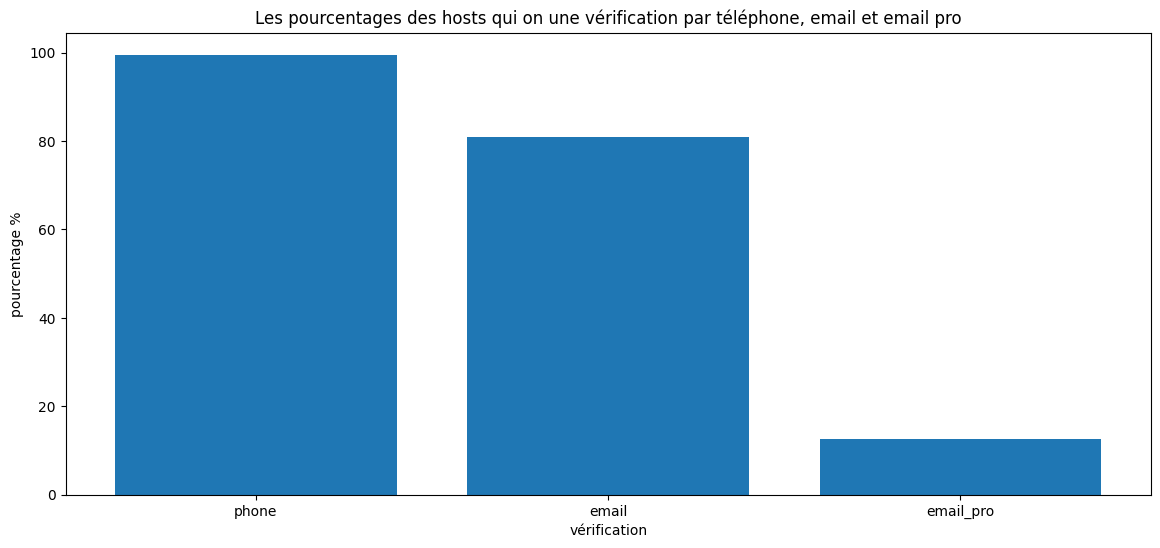

In [25]:
# On commence par instancier une figure et un axe.
# De manière optionnelle, on peut ici préciser sa taille
f, ax = plt.subplots()
f.set_size_inches(14, 6)

# On crée notre ax
xaxis= ['phone', 'email','email_pro']
yaxis= [pourcentage_phone, pourcentage_email,pourcentage_email_pro]
ax.bar(xaxis,yaxis)  
# On ajoute des titres à nos figures et à nos axes (optionnel mais conseillé)
ax.set_title("Les pourcentages des hosts qui on une vérification par téléphone, email et email pro")
ax.set_xlabel("vérification")
ax.set_ylabel("pourcentage %")
 
# On peut si on veut enregistrer cette figure
plt.savefig("number_hosts_reviews_parquartier.png")

# On affiche notre graphe (optionnel sur les notebook)
plt.show()


# # Créer un diagramme circulaire pour les pourcentages d'acceptation pourcentage de reponse moyen des hôtes   #
# f, ax = plt.subplots()
# f.set_size_inches(10, 3)


# labels = ["phone","email", "email_pro"]
# sizes =  [pourcentage_phone,pourcentage_email, pourcentage_email_pro]
# colors = ["yellowgreen", "gold", "lightskyblue"]
# explode = (0.05, 0.05, 0.05)

# # Utiliser la méthode pie de l'objet ax
# ax.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
# ax.axis('equal')

# # add a title to the figure
# plt.suptitle('Les pourcentages des hosts qui on une vérification par téléphone, email et email pro')
# plt.show()

In [57]:
len(host_verif)

6809

In [26]:
#4. En fonction du room type, calculez le nombre moyen d’ “amenities” et son écart type.
room_type_accommodates_average=df_air_bnb.groupby('room_type')['accommodates'].mean()
print(room_type_accommodates_average)

room_type_accommodates_std=df_air_bnb.groupby('room_type')['accommodates'].std()
print(room_type_accommodates_std)


room_type
Entire home/apt    3.117108
Hotel room         2.322581
Private room       2.418799
Shared room        1.948718
Name: accommodates, dtype: float64
room_type
Entire home/apt    1.436059
Hotel room         1.501630
Private room       1.097284
Shared room        2.512586
Name: accommodates, dtype: float64


In [27]:
#5. Quel est le prix median par type de room, le maximum, le minimum, le premier et le troisième quartile?

##le prix median par type de room
df_room_type_price = df_air_bnb[['room_type','price']]
# remplacer tous les caractères autres que les chiffres et le point décimal par une chaîne de caractères vide
df_room_type_price['price']=df_room_type_price['price'].str.replace('[^\d\.]', '', regex=True).astype(float)
df_room_type_price
prix_median_by_room_type = df_room_type_price.groupby('room_type')['price'].median()
print('-------------------------')
print("prix_median_by_room_type :")
print('-------------------------')
print(prix_median_by_room_type)
##le prix max par type de room
prix_max_by_room_type = df_room_type_price.groupby('room_type')['price'].max()
print('-------------------------')
print("prix_max_by_room_type :")
print('-------------------------')
print(prix_max_by_room_type)
#df_room_type_price.groupby('room_type')['price'].min()
#le prix min par type de room
prix_min_by_room_type = df_room_type_price.groupby('room_type')['price'].min()
print('-------------------------')
print("prix_min_by_room_type :")
print('-------------------------')
print(prix_min_by_room_type)
#------------------------------------------------------------------------
print('-------------------------')
q1 = df_room_type_price.groupby('room_type')['price'].quantile(q=0.25)
print(q1)


-------------------------
prix_median_by_room_type :
-------------------------
room_type
Entire home/apt    200.0
Hotel room         146.0
Private room       122.0
Shared room         50.0
Name: price, dtype: float64
-------------------------
prix_max_by_room_type :
-------------------------
room_type
Entire home/apt     7900.0
Hotel room           800.0
Private room       71536.0
Shared room          500.0
Name: price, dtype: float64
-------------------------
prix_min_by_room_type :
-------------------------
room_type
Entire home/apt    20.0
Hotel room          0.0
Private room       24.0
Shared room        30.0
Name: price, dtype: float64
-------------------------
room_type
Entire home/apt    150.0
Hotel room         116.5
Private room        91.0
Shared room         42.0
Name: price, dtype: float64


/tmp/ipykernel_10795/186501524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room_type_price['price']=df_room_type_price['price'].str.replace('[^\d\.]', '', regex=True).astype(float)
